# Question 1

In [0]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_data = pd.read_csv('/content/drive/My Drive/Datasets.zip (Unzipped Files)/Datasets/q1/train.csv',header=None)

In [0]:
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19996,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19997,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19998,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Splitting data into train and validation randomly

def train_test_split(data,test_size):
  if(isinstance(test_size,float)):
    test_size=round(test_size*len(data))
  i = data.index.tolist()
  test_indices = random.sample(population=i, k=test_size)
  test_df = data.loc[test_indices]
  train_df = data.drop(test_indices)
  return train_df,test_df

In [0]:
train_d,test_d = train_test_split(train_data,1000)

In [0]:
#Size of train and validation data
print("Total Data Size= ",len(train_data),"\nTrain Size= ",len(train_d),"\nValidation Size= ",len(test_d))

Total Data Size=  20000 
Train Size=  19000 
Validation Size=  1000


In [0]:
# Split data and label...
tr= np.array(train_d)
train_d=tr[:,1:]
train_l=tr[:,0]
tr= np.array(test_d)
test_d=tr[:,1:]
test_l=tr[:,0]

In [0]:
#Euclidean function
def computeEuclidean (k=5):
  m=0
  result=[]
  for j in test_d:
    m=0
    dist=[]
    for i in train_d:
      dist.append([np.linalg.norm(i-j),m])
      m=m+1
    dist=sorted(dist)
    re=[]
    for l in range(k):
      temp=train_l[dist[l][1]]
      re.append(temp)
    result.append(max(set(re), key = re.count))
  return result

In [0]:
def Manhattan(i,j):
  s=(abs(i-j)).sum()
  return s

In [0]:
def computeManhattan(k=5):
  m=0
  result=[]
  for j in test_d:
    m=0
    dist=[]
    for i in train_d:
      dist.append([Manhattan(i,j),m])
      m=m+1
    dist=sorted(dist)
    re=[]
    for l in range(k):
      temp=train_l[dist[l][1]]
      re.append(temp)
    result.append(max(set(re), key = re.count))
  return result

In [0]:
result=computeEuclidean()
result1=computeEuclidean(k=3)
result2=computeEuclidean(k=7)
result3=computeEuclidean(k=13)

In [0]:
acc=0.0
acc1=0.0
acc2=0.0
acc3=0.0
for i in range(len(result)):
    if result[i]==test_l[i]:
        acc+=1
    if result1[i]==test_l[i]:
        acc1+=1
    if result2[i]==test_l[i]:
        acc2+=1
    if result3[i]==test_l[i]:
        acc3+=1
print ('Accuracy for k=3: ',(acc1)/len(result)*100,'%\n')
print ('Accuracy for k=5: ',(acc)/len(result)*100,'%\n')
print ('Accuracy for k=7: ',(acc2)/len(result)*100,'%\n')
print ('Accuracy for k=13: ',(acc3)/len(result)*100,'%\n')

Accuracy for k=3:  97.39999999999999 %

Accuracy for k=5:  97.2 %

Accuracy for k=7:  96.7 %

Accuracy for k=13:  96.2 %



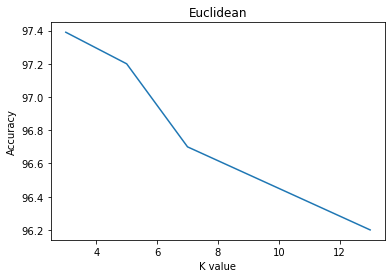

In [0]:
x=[3,5,7,13]
y=[97.39,97.2,96.7,96.2]
plt.plot(x,y)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Euclidean")
plt.show()

In [0]:
result=computeManhattan(k=3)
result1=computeManhattan(k=5)
result2=computeManhattan(k=7)
result3=computeManhattan(k=13)

In [0]:
#Using Manhattan 
acc=0.0
acc1=0.0
acc2=0.0
acc3=0.0
for i in range(len(result)):
    if result[i]==test_l[i]:
        acc+=1
    if result1[i]==test_l[i]:
        acc1+=1
    if result2[i]==test_l[i]:
        acc2+=1
    if result3[i]==test_l[i]:
        acc3+=1
print ('Accuracy for k=3: ',(acc)/len(result)*100,'%\n')
print ('Accuracy for k=5: ',(acc1)/len(result)*100,'%\n')
print ('Accuracy for k=7: ',(acc2)/len(result)*100,'%\n')
print ('Accuracy for k=13: ',(acc3)/len(result)*100,'%\n')

Accuracy for k=3:  94.8 %

Accuracy for k=5:  94.8 %

Accuracy for k=7:  94.5 %

Accuracy for k=13:  93.7 %



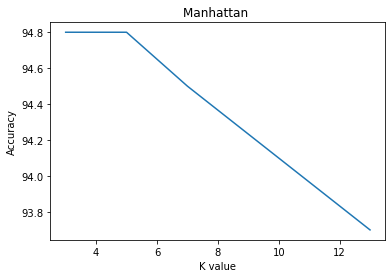

In [0]:
x=[3,5,7,13]
y=[94.8,94.8,94.5,93.7]
plt.plot(x,y)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Manhattan ")
plt.show()

In [0]:
#Load test data and test label
test_d = pd.read_csv('/content/drive/My Drive/Datasets.zip (Unzipped Files)/Datasets/q1/test.csv',header=None)
test_l = pd.read_csv('/content/drive/My Drive/Datasets.zip (Unzipped Files)/Datasets/q1/test_labels.csv',header=None)
tr=train_data.values
train_d=tr[:,1:]
train_l=tr[:,0]
test_d=np.array(test_d)
test_l=np.array(test_l)

In [0]:
#Size of train and validation data
print("Total Data Size= ",(train_data.values.shape),"\nTrain Size= ",train_d.shape,"\nTest Size= ",test_d.shape)

Total Data Size=  (20000, 785) 
Train Size=  (20000, 784) 
Test Size=  (1000, 784)


In [0]:
result=computeEuclidean(k=3)

In [0]:
acc=0.0
for i in range(len(result)):
    if result[i]==test_l[i]:
        acc+=1
print ('Accuracy=',(acc)/len(result)*100,'%')

Accuracy= 96.89999999999999 %


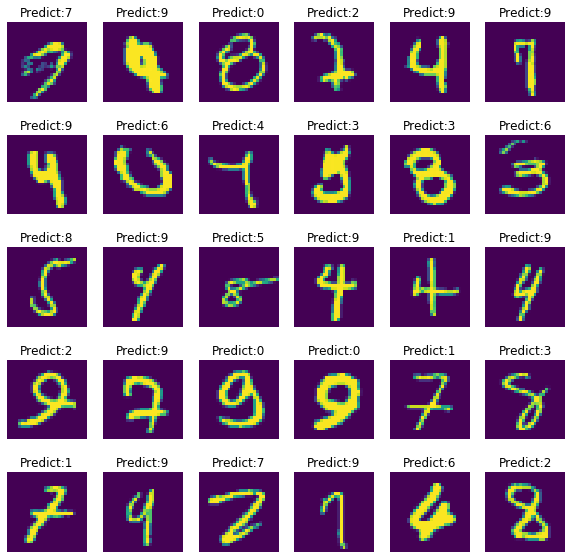

In [0]:
k=[]
for i in range(len(result)):
    if result[i]!=test_l[i]:
        k.append([test_d[i],result[i]])
fig=plt.figure(figsize=(10, 10))
columns = 6
rows = 5
for i in range(1, columns*rows +1):
    img = np.resize(k[i][0],[28,28])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Predict:"+str(k[i][1]))
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(result,test_l)

array([[ 93,   0,   0,   0,   0,   0,   0,   0,   1,   2],
       [  0, 101,   0,   0,   1,   0,   0,   2,   0,   0],
       [  0,   0, 107,   0,   0,   0,   0,   1,   1,   1],
       [  0,   0,   0, 107,   0,   1,   0,   0,   2,   0],
       [  0,   0,   0,   0,  82,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0,  79,   0,   0,   2,   0],
       [  1,   0,   0,   1,   1,   0, 101,   0,   0,   0],
       [  0,   0,   1,   0,   0,   0,   0,  97,   0,   1],
       [  0,   0,   0,   0,   0,   1,   0,   0,  94,   0],
       [  0,   0,   0,   0,   7,   0,   0,   3,   0, 108]])

In [0]:
from sklearn.metrics import f1_score
f1_score(result,test_l,average=None)

array([0.97894737, 0.98536585, 0.98165138, 0.98165138, 0.94252874,
       0.97530864, 0.98536585, 0.95566502, 0.96410256, 0.93913043])

In [6]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(train_d, train_l)
y_test= clf.predict(test_d)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,test_l)

0.967